In [1]:
import numpy as np
#from scipy import stats
import scarlet
import scarlet.display

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# use a good colormap and don't interpolate the pixels
matplotlib.rc('image', cmap='inferno', interpolation='none', origin='lower')

from astropy.io import fits
from astropy.wcs import WCS
from matplotlib.colors import LogNorm

from functools import partial
from scarlet.display import AsinhMapping
#from photutils.psf import extract_stars
from astropy.table import Table
from astropy.nddata import NDData
from astropy.visualization import simple_norm
#from photutils import EPSFBuilder
from astropy.visualization.lupton_rgb import AsinhMapping, LinearMapping

In [2]:
print(scarlet.__file__)

/home/mj1e16/scarletCC/scarlet/scarlet/__init__.py


In [2]:
import sep

In [16]:
dataTest = np.load("./data/psf_unmatched_sim.npz")
catalogueTest = dataTest["catalog"]

In [18]:
len(catalogueTest)

7

In [27]:
datatestarino = np.load("./data/hsc_cosmos_35.npz")
imagestestarino = datatestarino["images"]
imagestestarino.shape

(5, 58, 48)

In [28]:
imageList.shape

(5, 1979, 3974)

In [29]:
weigthsList.shape

(5, 1979, 3974)

In [5]:
imageU = fits.open('/home/mj1e16/scarlet/scarlet/data/globularCluster/c4d_130511_041112_u_50.fits')
dataU = imageU[0].data.byteswap().newbyteorder()
wcsU = WCS(imageU[0].header)

imageG = fits.open('/home/mj1e16/scarlet/scarlet/data/globularCluster/c4d_130511_040903_g_50.fits')
dataG = imageG[0].data.byteswap().newbyteorder()
wcsG = WCS(imageG[0].header)

imageR = fits.open('/home/mj1e16/scarlet/scarlet/data/globularCluster/c4d_130511_035740_r_50.fits')
dataR = imageR[0].data.byteswap().newbyteorder()
wcsR = WCS(imageR[0].header)

imageI = fits.open('/home/mj1e16/scarlet/scarlet/data/globularCluster/c4d_130511_040445_i_50.fits')
dataI = imageI[0].data.byteswap().newbyteorder()
wcsI = WCS(imageI[0].header)

imageZ = fits.open('/home/mj1e16/scarlet/scarlet/data/globularCluster/c4d_130511_040655_z_50.fits')
dataZ = imageZ[0].data.byteswap().newbyteorder()
wcsZ = WCS(imageZ[0].header)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [6]:
n1,n2 = dataU.shape

In [3]:
channels = ['u','g','r','i','z']

In [4]:
def makeCatalog(img, lvl = 4):
    if np.size(img.shape) == 3:
        detect = img.mean(axis=0) # simple average for detection
    else:
        detect = img

    bkg = sep.Background(detect)
    catalog = sep.extract(detect, lvl, err=bkg.globalrms)
    if np.size(img.shape) == 3:
        bg_rms = np.array([sep.Background(band).globalrms for band in img])
    else:
        bg_rms =  sep.Background(detect).globalrms
    return catalog, bg_rms

In [5]:
def makeImageData(imageName,psfName,filterName,maxx='None',maxy='None'):
    image = fits.open(imageName)
    data = image[0].data.byteswap().newbyteorder()
    wcs = WCS(image[0].header)
    BG = sep.Background(data).globalback
    data_BS = data - BG
    catalogue, bg_rms = makeCatalog(data_BS)
    weights = np.ones_like(data_BS) / (bg_rms**2)
    psf = fits.open(psfName)[0].data
    #psf = psf[None,:,:]
#    psf = scarlet.PSF(psf)
    return {'data':data_BS,'wcs':wcs,'backgorund':BG,'catalogue':catalogue,'weights':weights,'psf':psf,'filter':filterName}

In [6]:
images = ['/home/mj1e16/scarlet/scarlet/data/globularCluster/c4d_130511_041112_u_50.fits',
         '/home/mj1e16/scarlet/scarlet/data/globularCluster/c4d_130511_040903_g_50.fits',
         '/home/mj1e16/scarlet/scarlet/data/globularCluster/c4d_130511_035740_r_50.fits',
         '/home/mj1e16/scarlet/scarlet/data/globularCluster/c4d_130511_040445_i_50.fits',
         '/home/mj1e16/scarlet/scarlet/data/globularCluster/c4d_130511_040655_z_50.fits']

psfImages = ['/home/mj1e16/scarlet/scarlet/data/globularCluster/psfU.fits',
            '/home/mj1e16/scarlet/scarlet/data/globularCluster/psfG.fits',
            '/home/mj1e16/scarlet/scarlet/data/globularCluster/psfR.fits',
            '/home/mj1e16/scarlet/scarlet/data/globularCluster/psfI.fits',
            '/home/mj1e16/scarlet/scarlet/data/globularCluster/psfZ.fits']

channels = ['u','g','r','i','z']

miny = 1
maxy = 3975

maxx = 1980
minx = 1



for x in range(len(channels)):
    Data = makeImageData(images[x],psfImages[x],channels[x],maxx=3974)
    if x ==  0:
        imageList, catalogueList, weigthsList, psfList = [Data['data'][minx:maxx,miny:maxy]], [Data['catalogue']], [Data['weights'][minx:maxx,miny:maxy]], [Data['psf']]
        print(Data['data'][minx:maxx,miny:maxy].shape)
        print(psfList[x].shape)
    else:
        print(Data['data'][minx:maxx,miny:maxy].shape)
        imageList = np.append(imageList,[Data['data'][minx:maxx,miny:maxy]],axis=0)
        catalogueList.append(Data['catalogue'])
        weigthsList = np.append(weigthsList,[Data['weights'][minx:maxx,miny:maxy]],axis=0)
        psfList = np.append(psfList,[Data['psf']],axis=0)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


(1979, 3974)
(101, 101)
(1979, 3974)
(1979, 3974)
(1979, 3974)
(1979, 3974)


In [8]:
Data['psf'][None,:,:].shape

(1, 101, 101)

In [7]:
psfs=scarlet.PSF(psfList)

In [46]:
psfs

In [8]:
observation = scarlet.Observation(imageList,
                                 psfs=psfs,
                                 weights=weigthsList,
                                 channels=channels)

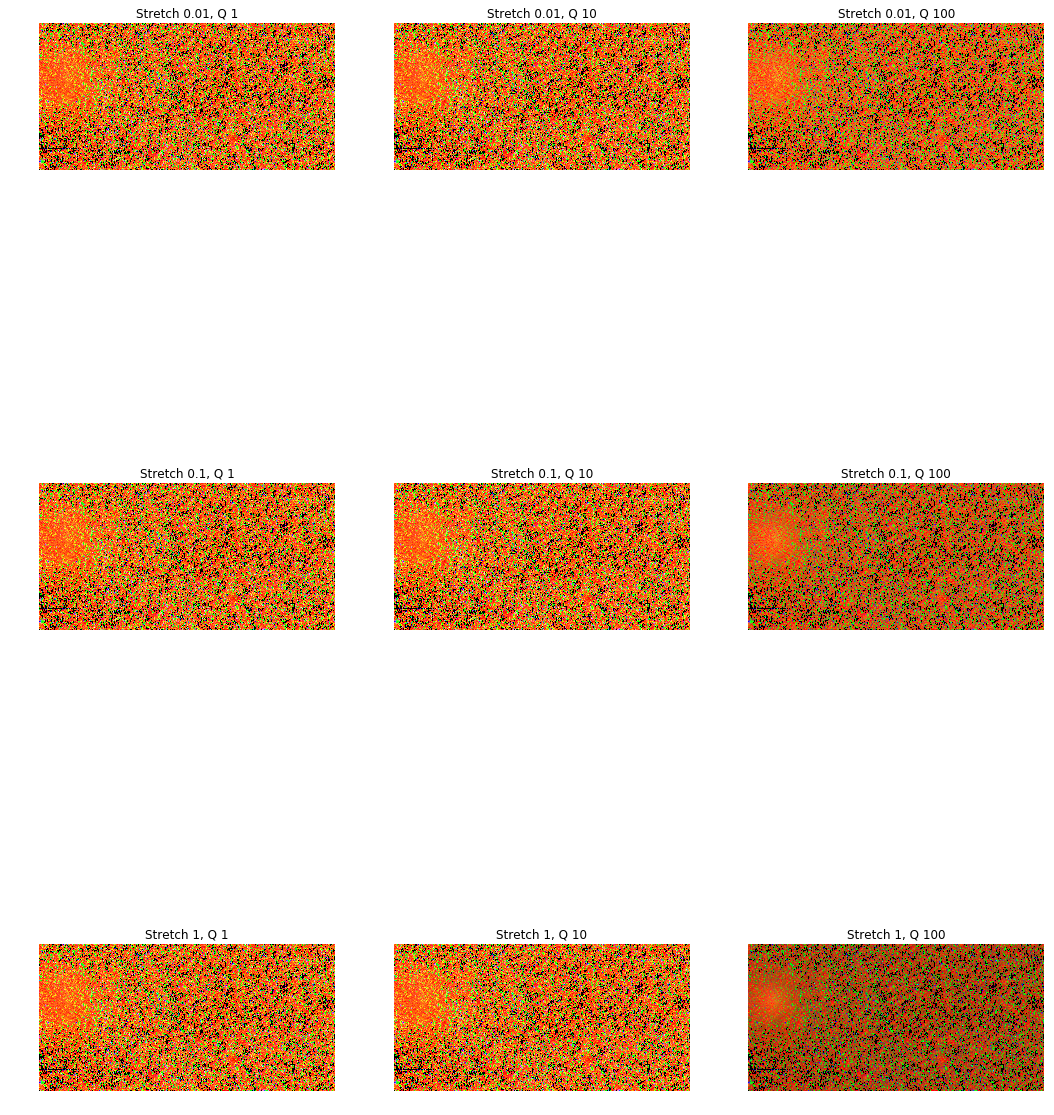

In [14]:
fig, ax = plt.subplots(3,3, figsize=(18,24))
for i, stretch in enumerate([0.01, 0.1, 1]):
    for j, Q in enumerate([1, 10, 100]):
        asinh = AsinhMapping(minimum=0, stretch=stretch, Q=Q)
        # Scale the RGB channels for the image
        img_rgb = scarlet.display.img_to_rgb(imageList, norm=asinh)
        ax[i][j].imshow(img_rgb)
        ax[i][j].set_title("Stretch {}, Q {}".format(stretch, Q))
        ax[i][j].axis('off')

In [9]:
from functools import partial

In [10]:
norm =  AsinhMapping(minimum=0, stretch=0.1, Q=10)

In [11]:
model_psf = scarlet.PSF(partial(scarlet.psf.gaussian, sigma=0.9), shape=(None,101,101))

In [12]:
model_frame = scarlet.Frame(imageList.shape,
                          psfs=model_psf,
                          channels=channels)


In [13]:
observation = scarlet.Observation(
    imageList,
    psfs=psfs,
    weights=weigthsList,
    channels=channels).match(model_frame)


In [ ]:
sources = []

for k,src in enumerate(catalogueList[0]):
    print(k)
    sources.append(scarlet.ExtendedSource(model_frame,(src['y'],src['x']),observation))

0
1
2


No flux above threshold for source at y=0 x=266


3
4
5
6


No flux above threshold for source at y=0 x=226


7
8
9
10
11
12


In [53]:
catalogueList[0]

array([(19.59170151,  13,  13,  164,  176,    0,    0,  169.91459058,    0.        , 12.85495307, 0.0833333 ,  0.        , 0.03451679, 2.04127531e-04,  0.00000000e+00, 3.58538055, 0.28867507,  0.        , 0.07779103, 12.00000477, -0.        ,   356.80731201,   806.31854248,  35.28372192,  89.52761078,  172,    0,  172,    0, 11),
       (19.59170151,   9,   9,  256,  264,    0,    0,  260.02305068,    0.        ,  6.89325077, 0.0833333 ,  0.        , 0.02410939, 2.97611623e-04,  0.00000000e+00, 2.6255002 , 0.28867507,  0.        , 0.14506944, 12.00000477, -0.        ,   245.87205505,   569.20782471,  30.85578156,  80.43373871,  263,    0,  263,    0, 11),
       (19.59170151,   5,   5,  265,  269,    0,    0,  266.94601862,    0.        ,  1.89233374, 0.0833333 ,  0.        , 0.01393051, 5.56420687e-04,  0.00000000e+00, 1.3756212 , 0.28867507,  0.        , 0.52844799, 12.00000477, -0.        ,   134.0282135 ,   301.4831543 ,  30.72302055,  81.70075226,  266,    0,  266,    0, 11),
    

In [89]:
dataU_norm = AsinhMapping(minimum=-1, stretch=1)

In [92]:
xo,yo = catalogueU['x'], catalogueU['y']
ra, dec = wcsU.wcs_pix2world(yo,xo,0)

In [93]:
img_rgb = scarlet.display.img_to_rgb(dataU, norm=dataU_norm)

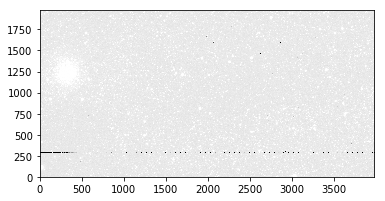

In [94]:
plt.imshow(img_rgb)

In [ ]:
shape = (len(channels),n1,n2)
frame = scarlet.Frame(shape,wcs=wcsU,psfs=,channels=channels)

In [97]:
model_psf = scarlet.PSF(partial(scarlet.psf.gaussian, sigma=.8), shape=(None, 8, 8))

AttributeError: module 'scarlet' has no attribute 'PSF'

In [100]:
catalogueU[0]

(19.59170151, 13, 13, 164, 176, 0, 0, 169.91459058, 0., 12.85495307, 0.0833333, 0., 0.03451679, 0.00020413, 0., 3.58538055, 0.28867507, 0., 0.07779103, 12.00000477, -0., 356.80731201, 806.31854248, 35.28372192, 89.52761078, 172, 0, 172, 0, 11)

In [200]:
dataShape = dataU.shape
xcoords = catalogueU['xpeak']
ycoords = catalogueU['ypeak']
flux = catalogueU['flux']
indexes = np.arange(len(xcoords))

In [201]:
hsize = 25
mask = ((xcoords > hsize) & (xcoords < (dataShape[1] - 1 - hsize)) &
        (ycoords > hsize) & (ycoords < (dataShape[0] -1 - hsize)))

In [202]:
xcoords_noEdges = xcoords[mask]
ycoords_noEdges = ycoords[mask]
flux_noEdges = flux[mask]
indexes_noEdges = indexes[mask]

In [203]:
sep = [((xcoords - x)**2 + (ycoords-y)**2)**0.5 for x,y in zip(xcoords_noEdges,ycoords_noEdges)]

In [204]:
sep = [x[x < 35] for x in sep]

In [205]:
sepLengths = [len(x) for x in sep]

In [207]:
psfLocs = []
for x in range(len(sepLengths)):
    if sepLengths[x] == 1:
        psfLocs.append(indexes_noEdges[x])

In [208]:
print(len(psfLocs))

275


In [198]:
stars_flux = flux[psfLocs]
ind_max = np.argpartition(stars_flux,-50)[-50:]

In [199]:
ind_max

array([  0, 222, 227,  68, 152,  70, 231, 155, 156, 215, 141, 157, 204,
        29,  46,  28, 202, 242, 201,  78,  49, 128,  24, 248, 198, 250,
       197, 196,  89, 195,  16, 194, 257, 193, 259, 119, 192, 191, 190,
       264, 189, 103,  50, 110, 109, 108, 185,  98, 182,  54])

In [210]:
tab_stars_x = xcoords[psfLocs]
tab_stars_x_bright = tab_stars_x[ind_max]

tab_stars_y = ycoords[psfLocs]
tab_stars_y_bright = tab_stars_y[ind_max]

In [211]:
stars_tbl = Table() 
stars_tbl['x'] = tab_stars_x_bright
stars_tbl['y'] = tab_stars_y_bright

In [212]:
print(len(stars_tbl))

50


In [217]:
nddata = NDData(data=data_U_BS_OG)  
stars = extract_stars(nddata,stars_tbl,size=25)

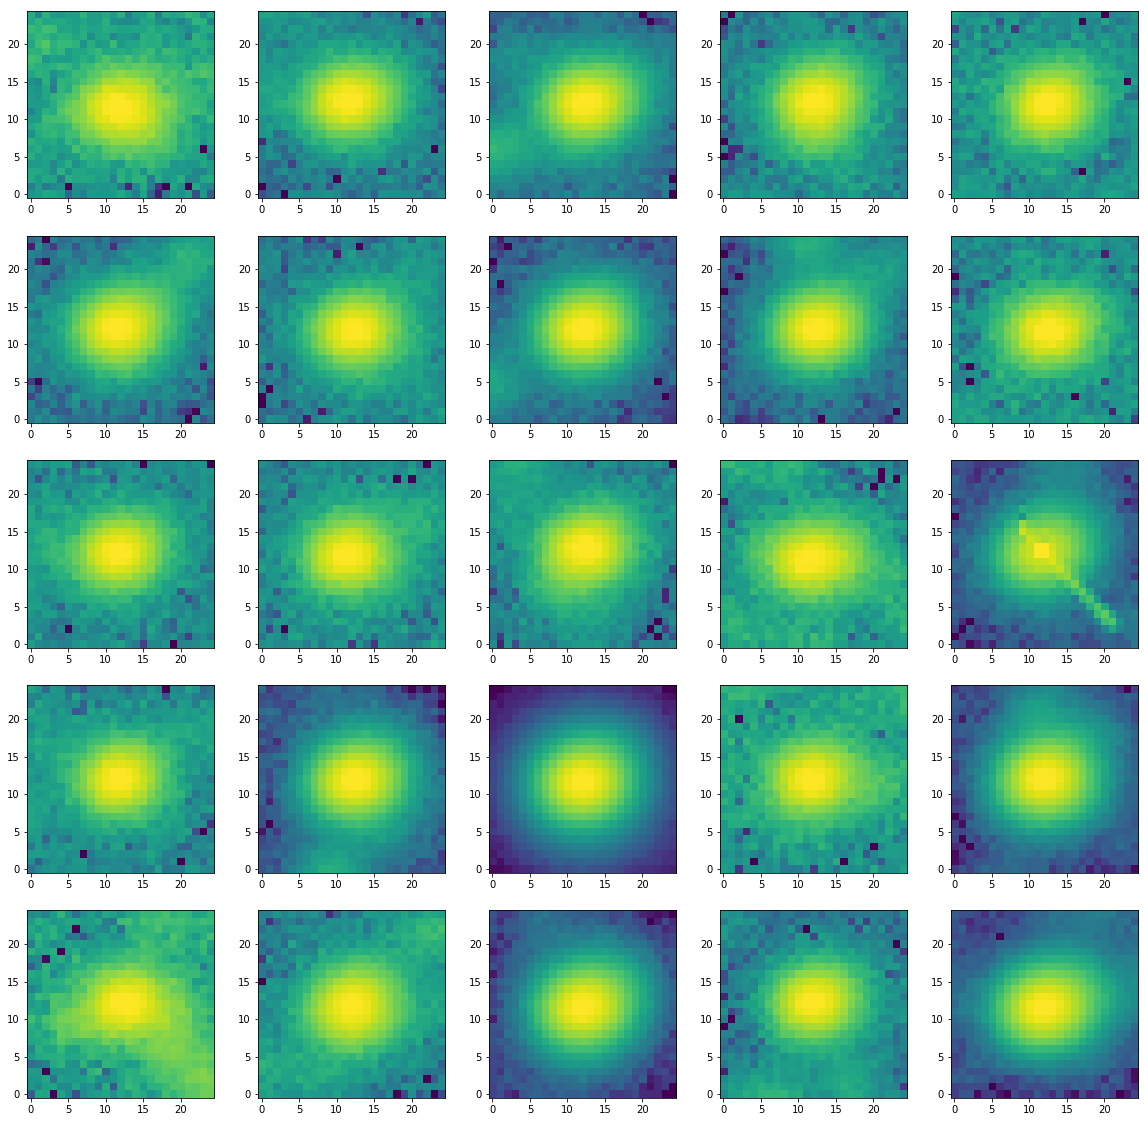

In [218]:
nrows = 5
ncols = 5
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20),
                       squeeze=True)
ax = ax.ravel()
for i in range(nrows*ncols):
    norm = simple_norm(stars[i], 'log', percent=99.)
    ax[i].imshow(stars[i], norm=norm, origin='lower', cmap='viridis')

In [219]:
epsf_builder = EPSFBuilder(oversampling=4, maxiters=3,progress_bar=False)  
epsf, fitted_stars = epsf_builder(stars)  


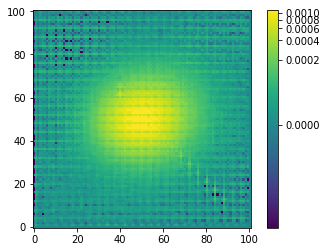

In [220]:
norm = simple_norm(epsf.data, 'log', percent=99.)
plt.imshow(epsf.data, norm=norm, origin='lower', cmap='viridis')
plt.colorbar()

In [221]:
hdu = fits.PrimaryHDU(epsf.data)
hdul = fits.HDUList([hdu])
hdul.writeto('psfU.fits')